# Module 6 - Clustering for Diverse portfolio analysis

### Query 6.1 
Create a table/dataframe with the closing prices of 30 different stocks, with 10 from each of the caps

In [10]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:
small_cap_companies = ['BAJAJELEC','BOMDYEING','CENTURYPLY','FORTIS','GUJALKALI','IDFC','IRCON','ITDC','PVR']
mid_cap_companies = ['IGL','JINDALSTEL','MRPL','NBCC','SUNTV','TATACHEM','TATAPOWER','VOLTAS','CASTROLIND']
large_cap_companies = ['ITC','LT','M&M','TCS','TITAN','GAIL','MARUTI','CIPLA','AXISBANK']

small_cap = pd.read_csv(r'C:\Users\DELL\Desktop\Internship1\Small_Cap\ASHOKA.csv')[['Date', 'Close Price']]
small_cap.columns = ['Date', 'ASHOKA']

for company in small_cap_companies:
    path = r"C:\\Users\\DELL\\Desktop\\Internship1\\Small_Cap\\" + company + '.csv'
    temp_df = pd.read_csv(path)[['Date', 'Close Price']]
    temp_df.columns = ['Date', company]
    small_cap = small_cap.merge(temp_df,left_on = 'Date', right_on = 'Date')
    
mid_cap = pd.read_csv(r'C:\Users\DELL\Desktop\Internship1\Mid_Cap\IDBI.csv')[['Date', 'Close Price']]
mid_cap.columns = ['Date', 'IDBI']

for company in mid_cap_companies:
    path = r"C:\\Users\\DELL\\Desktop\\Internship1\\Mid_Cap\\" + company + '.csv'
    temp_df = pd.read_csv(path)[['Date', 'Close Price']]
    temp_df.columns = ['Date', company]
    mid_cap = mid_cap.merge(temp_df,left_on = 'Date', right_on = 'Date')  
    
large_cap = pd.read_csv(r'C:\Users\DELL\Desktop\Internship1\Large_Cap\INFY.csv')[['Date', 'Close Price']]
large_cap.columns = ['Date', 'INFY']

for company in large_cap_companies:
    path = r"C:\\Users\\DELL\\Desktop\\Internship1\\Large_Cap\\" + company + '.csv'
    temp_df = pd.read_csv(path)[['Date', 'Close Price']]
    temp_df.columns = ['Date', company]
    large_cap = large_cap.merge(temp_df,left_on = 'Date', right_on = 'Date')     
    
small_cap.drop('Date', axis = 1,inplace = True)
mid_cap.drop('Date', axis = 1,inplace = True)
large_cap.drop('Date', axis = 1,inplace = True)    

In [3]:
small_cap.head()

,ASHOKA,BAJAJELEC,BOMDYEING,CENTURYPLY,FORTIS,GUJALKALI,IDFC,IRCON,ITDC,PVR
0,104.35,502.55,167.75,180.55,134.95,596.65,39.75,415.3,322.85,1201.75
1,106.60,500.50,159.40,176.20,135.35,600.05,40.75,427.0,315.70,1224.90
2,110.85,495.70,151.45,178.10,136.25,608.05,40.65,421.4,320.80,1227.85
3,107.00,496.25,143.90,172.75,134.40,594.70,39.95,407.1,305.35,1199.55
4,103.50,488.75,136.75,161.70,134.70,594.00,38.45,399.8,289.35,1168.30


In [4]:
mid_cap.head()

,IDBI,IGL,JINDALSTEL,MRPL,NBCC,SUNTV,TATACHEM,TATAPOWER,VOLTAS,CASTROLIND
0,75.05,1000.25,114.20,134.2,197.60,912.20,629.80,83.55,431.85,449.85
1,76.65,1005.80,114.10,131.7,198.25,894.70,643.90,83.85,432.45,443.00
2,75.95,1019.10,116.40,135.1,200.35,887.05,638.10,85.35,430.20,439.55
3,69.95,1002.55,113.30,136.1,194.20,871.35,624.90,83.75,414.10,433.95
4,68.75,1000.15,112.15,133.6,193.55,852.40,616.45,84.15,415.75,437.10


In [5]:
large_cap.head()

,INFY,ITC,LT,M&M,TCS,TITAN,GAIL,MARUTI,CIPLA,AXISBANK
0,951.55,277.95,1742.40,1375.65,2365.10,483.65,414.00,6823.90,569.00,500.1
1,955.00,283.45,1740.70,1366.35,2429.15,488.30,411.40,6953.95,565.60,501.5
2,952.80,281.65,1755.45,1378.80,2455.35,481.75,408.30,6958.20,562.35,502.8
3,961.75,277.90,1722.60,1352.85,2536.20,471.65,404.75,6831.05,560.10,492.0
4,957.95,286.20,1724.55,1333.40,2507.15,471.15,401.05,6790.55,564.95,501.7


In [6]:
small_cap_values = pd.DataFrame(small_cap.pct_change().mean()*252)
small_cap_values = small_cap_values.merge(pd.DataFrame(small_cap.pct_change().std()*np.sqrt(252)) , left_index = True, right_index = True)
small_cap_values.columns = ['RETURNS', 'VOLATALITY']


mid_cap_values = pd.DataFrame(mid_cap.pct_change().mean()*252)
mid_cap_values = mid_cap_values.merge(pd.DataFrame(mid_cap.pct_change().std()*np.sqrt(252)) , left_index = True, right_index = True)
mid_cap_values.columns = ['RETURNS', 'VOLATALITY']


large_cap_values = pd.DataFrame(large_cap.pct_change().mean()*252)
large_cap_values = large_cap_values.merge(pd.DataFrame(large_cap.pct_change().std()*np.sqrt(252)) , left_index = True, right_index = True)
large_cap_values.columns = ['RETURNS', 'VOLATALITY']



### Query 6.2
Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [7]:
all_stock_df = small_cap_values.append(mid_cap_values)
all_stock_df = all_stock_df.append(large_cap_values)
all_stock_df

,RETURNS,VOLATALITY
ASHOKA,0.279869,0.417740
BAJAJELEC,0.181873,0.338312
BOMDYEING,-0.525268,0.613285
CENTURYPLY,-0.081519,0.433073
FORTIS,-0.045171,0.207890
GUJALKALI,-0.265071,0.326832
IDFC,-0.147609,0.397216
IRCON,-0.079240,0.301518
ITDC,-0.411430,0.370008
PVR,0.647056,0.285283


### Query 6.3
Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method

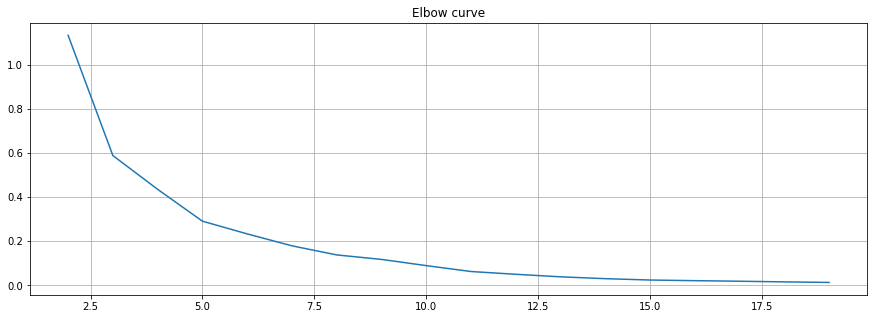

The change of slope is not significant after k = 5. Hence, we choose the number of clusters to be 5


In [20]:
from sklearn.cluster import KMeans
X = all_stock_df

wcss = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), wcss)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

print('The change of slope is not significant after k = 5. Hence, we choose the number of clusters to be 5')

### Query 6.4
Prepare a separate Data frame to show which stocks belong to the same cluster 

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

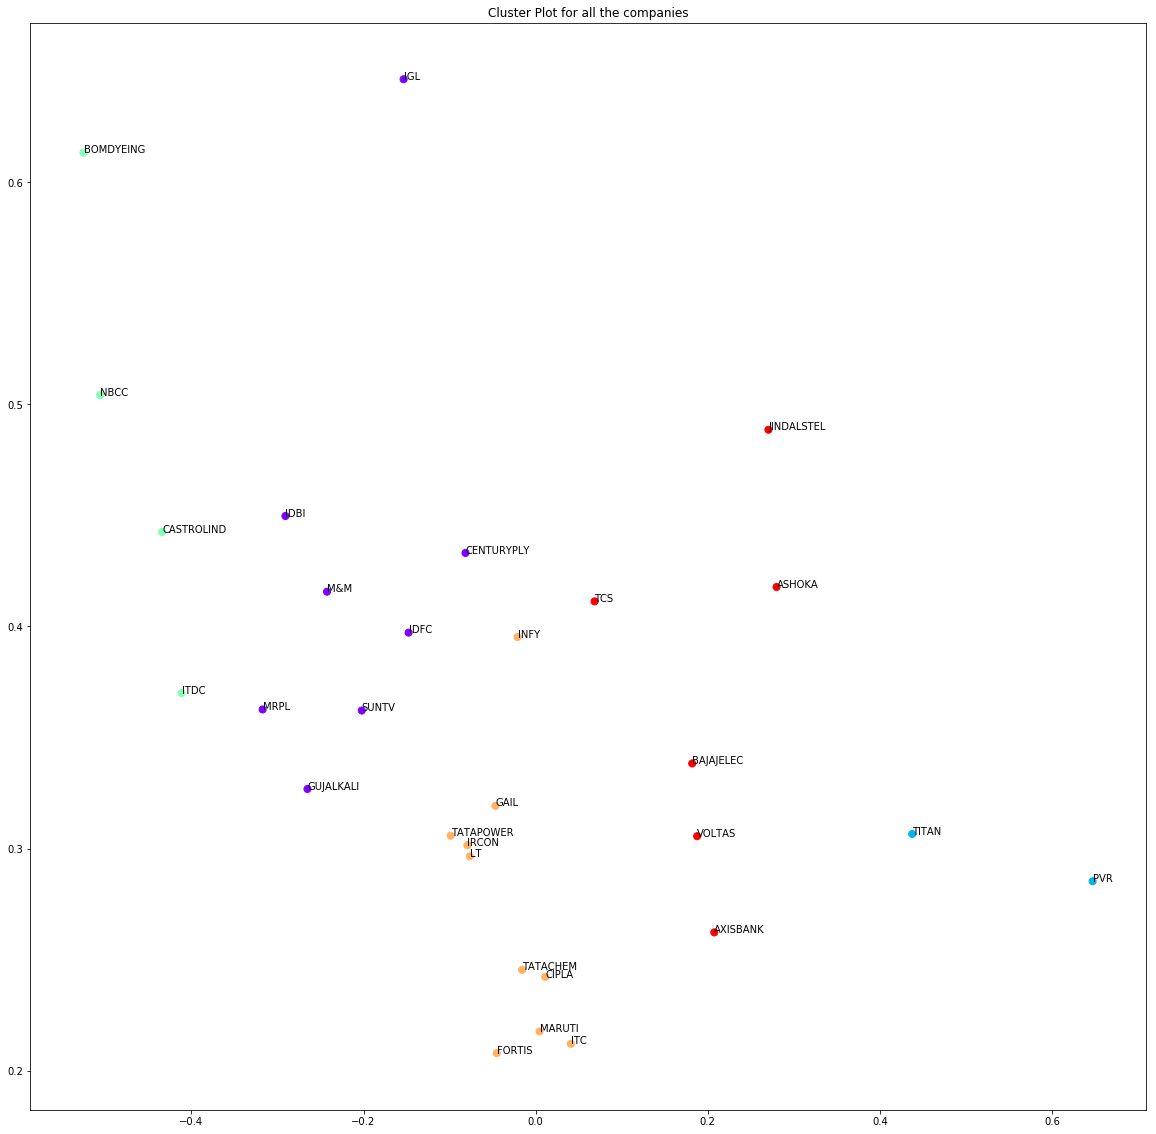

In [95]:
X =  all_stock_df.values

plt.figure()

kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_

Company = pd.DataFrame(all_stock_df.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
df = pd.concat([Company, cluster_labels],axis = 1)
df.columns = ['Company', 'Cluster']
df.set_index('Company', inplace = True)

df = all_stock_df.merge(df, left_index = True, right_index = True)

z = all_stock_df['RETURNS']
y = all_stock_df['VOLATALITY']
n = df.index

plt.figure()
fig, ax = plt.subplots(figsize = (20,20))

ax.scatter(z, y, s =  50 ,c = df['Cluster'], cmap = "rainbow")

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

t = plt.title('Cluster Plot for all the companies') 

plt.show()

In [91]:
pd.DataFrame(df['Cluster'])

,Cluster
Company,
ASHOKA,4
BAJAJELEC,4
BOMDYEING,0
CENTURYPLY,3
FORTIS,2
GUJALKALI,3
IDFC,3
IRCON,2
ITDC,0
